In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
airbnb = pd.read_csv('listings.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [56]:
typeofstuff = pd.DataFrame(airbnb[["property_type", "room_type", "bed_type", "review_scores_rating", "price"]])
typeofstuff["price"] = typeofstuff["price"].apply(lambda x: x.replace('$',''))
typeofstuff["price"] = typeofstuff["price"].apply(lambda x: x.replace(',',''))
typeofstuff["price"] = typeofstuff["price"].apply(lambda x: x.replace('.',''))
typeofstuff.head()

,property_type,room_type,bed_type,review_scores_rating,price
0,Apartment,Entire home/apt,Real Bed,95.0,8500
1,Apartment,Entire home/apt,Real Bed,96.0,15000
2,House,Entire home/apt,Real Bed,97.0,97500
3,Apartment,Entire home/apt,Real Bed,NaN,10000
4,House,Entire home/apt,Real Bed,92.0,45000


In [65]:
typeofstuff['price'] = typeofstuff['price'].astype(str).astype(float)
print(typeofstuff.dtypes)

property_type            object
room_type                object
bed_type                 object
review_scores_rating    float64
price                   float64
dtype: object


In [66]:
typeofstuff["price"] = typeofstuff["price"]/100
typeofstuff.head()

,property_type,room_type,bed_type,review_scores_rating,price
0,Apartment,Entire home/apt,Real Bed,95.0,85.0
1,Apartment,Entire home/apt,Real Bed,96.0,150.0
2,House,Entire home/apt,Real Bed,97.0,975.0
3,Apartment,Entire home/apt,Real Bed,NaN,100.0
4,House,Entire home/apt,Real Bed,92.0,450.0


House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64


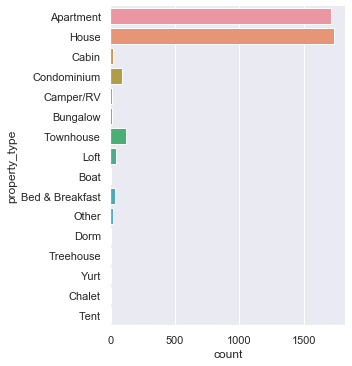

In [67]:
print(typeofstuff["property_type"].value_counts())
sb.catplot(y = "property_type", data = typeofstuff, kind = "count")

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64


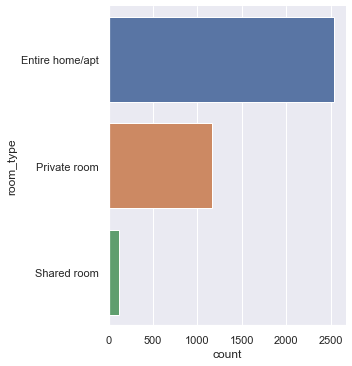

In [68]:
print(typeofstuff["room_type"].value_counts())
sb.catplot(y = "room_type", data = typeofstuff, kind = "count")

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64


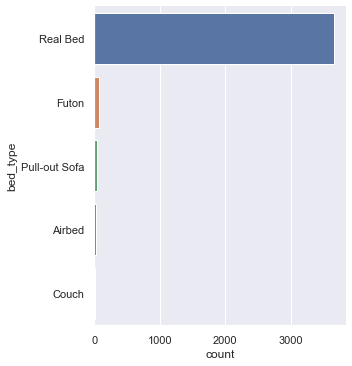

In [69]:
print(typeofstuff["bed_type"].value_counts())
sb.catplot(y = "bed_type", data = typeofstuff, kind = "count")

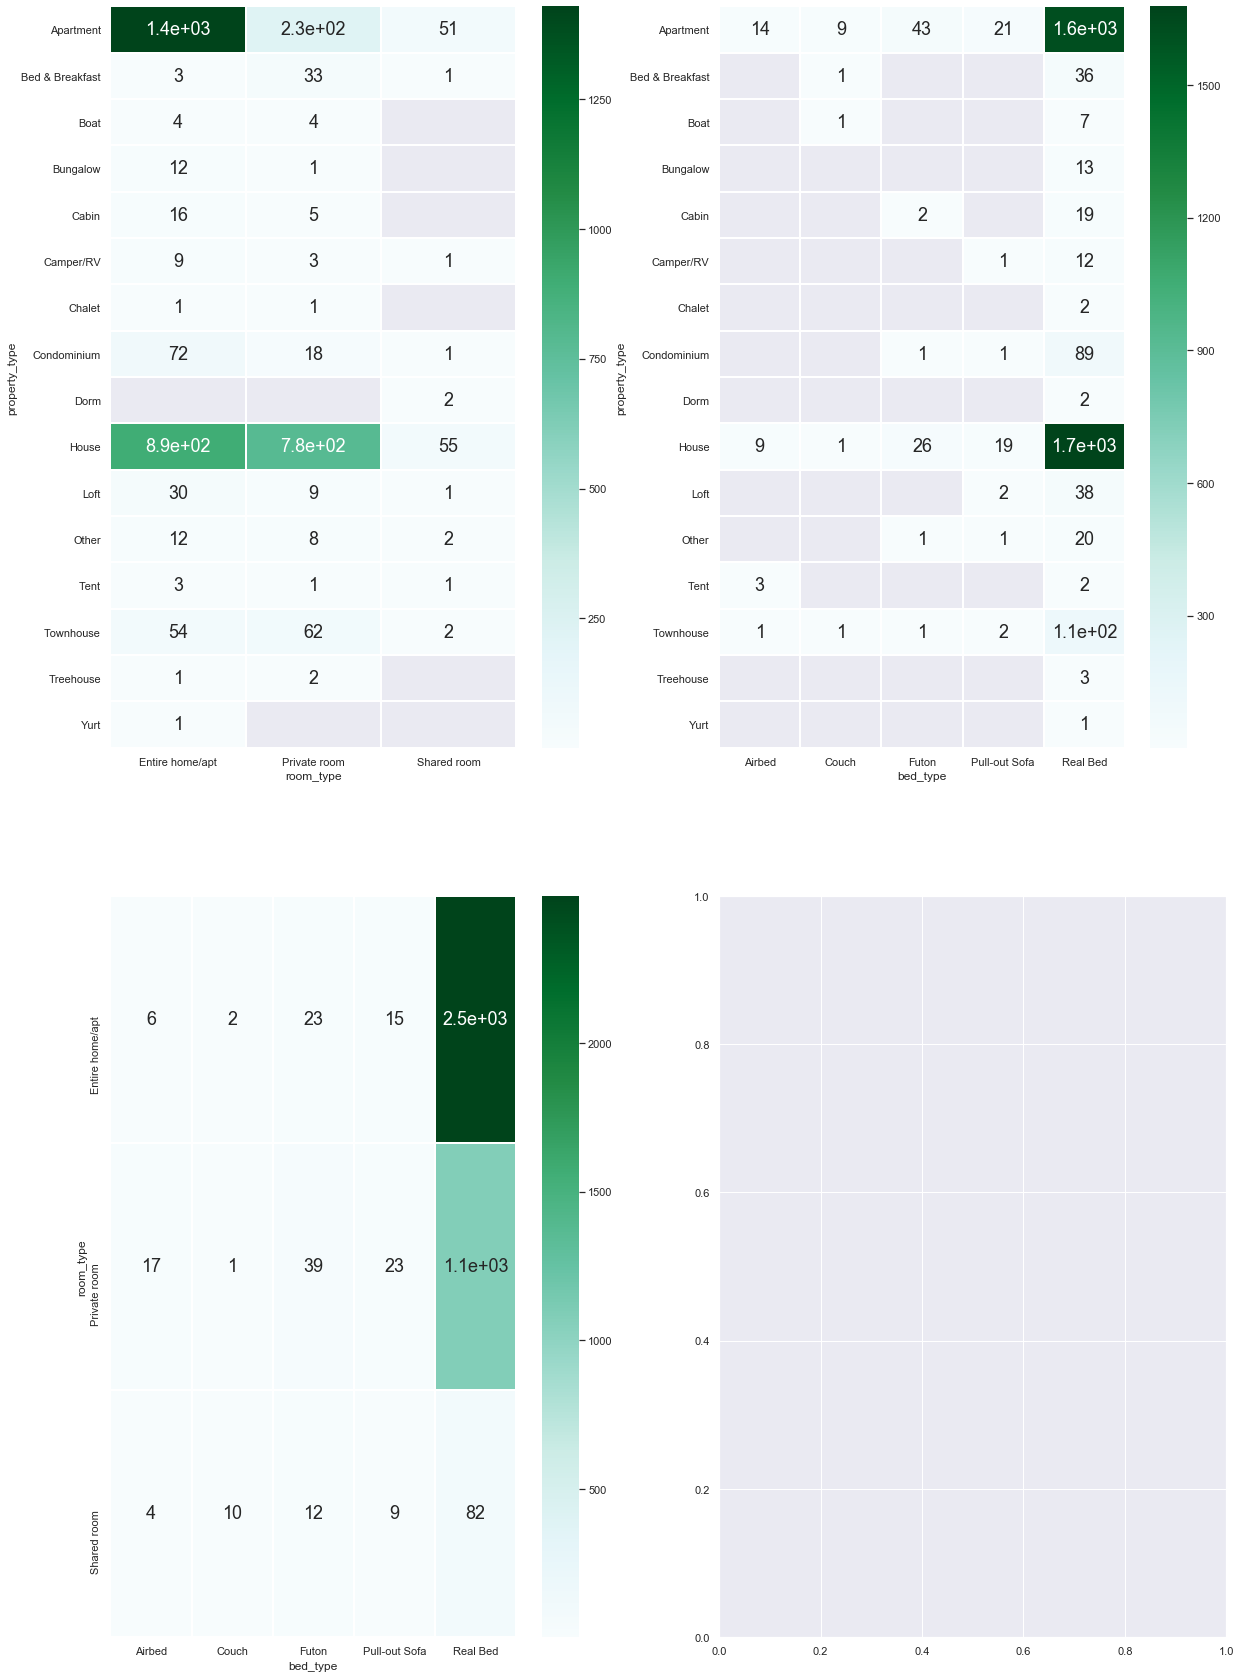

In [70]:
f, axes = plt.subplots(2, 2, figsize=(20, 30))
sb.heatmap(typeofstuff.groupby(['property_type', 'room_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(typeofstuff.groupby(['property_type', 'bed_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(typeofstuff.groupby(['room_type', 'bed_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[1,0])

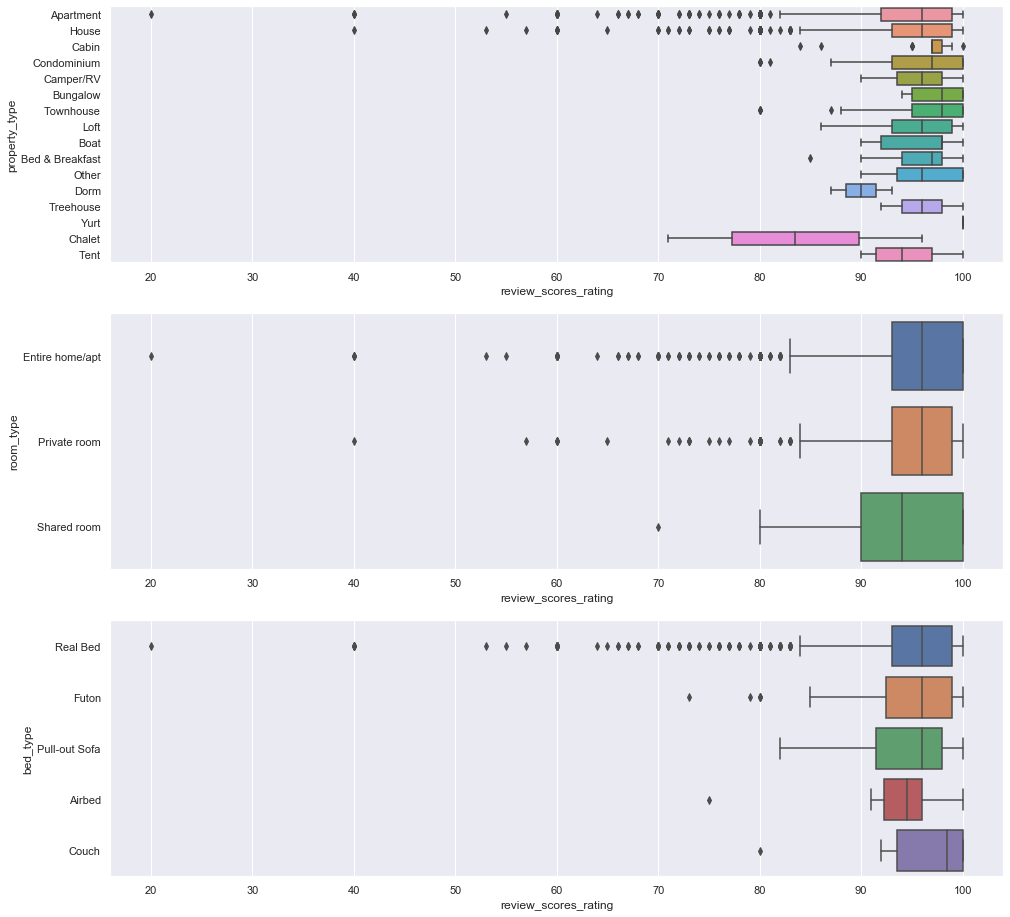

In [75]:
f, axes = plt.subplots(3, 1, figsize=(16,16))
sb.boxplot(x = 'review_scores_rating', y = 'property_type', data = typeofstuff, ax = axes[0])
sb.boxplot(x = 'review_scores_rating', y = 'room_type', data = typeofstuff, ax = axes[1])
sb.boxplot(x = 'review_scores_rating', y = 'bed_type', data = typeofstuff, ax = axes[2])

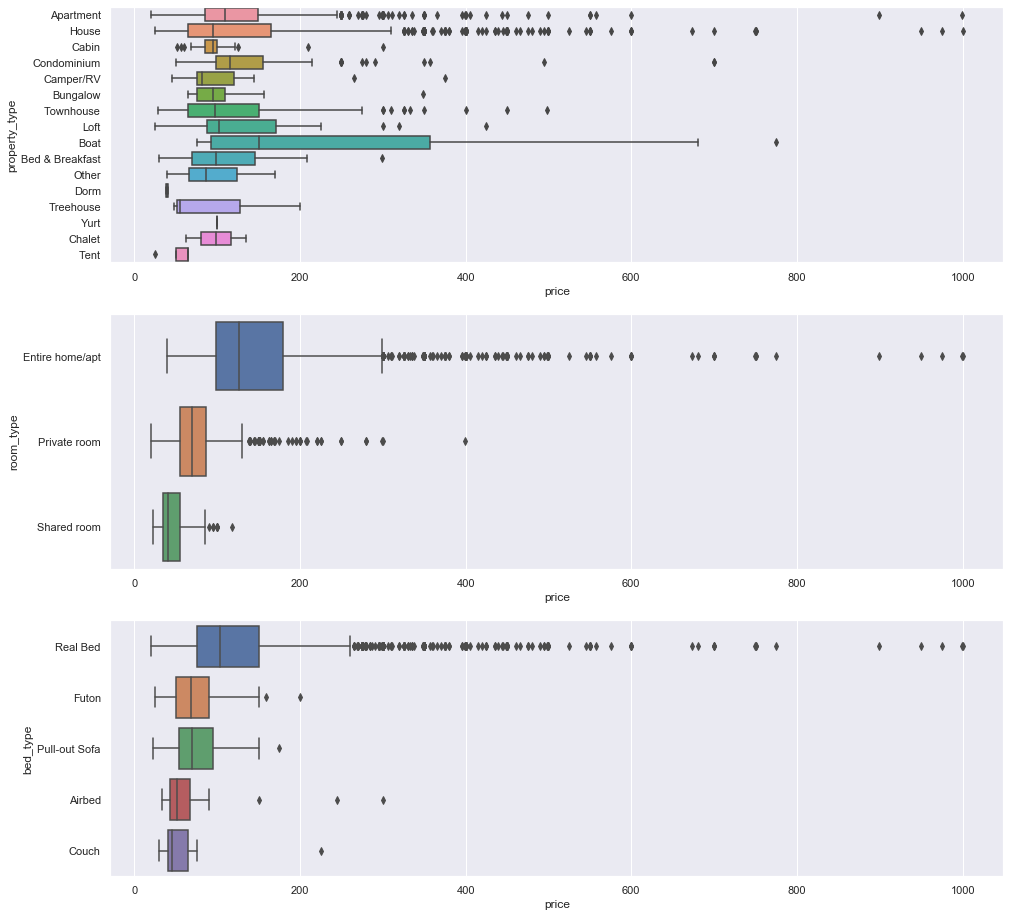

In [78]:
f, axes = plt.subplots(3, 1, figsize=(16,16))
sb.boxplot(x = 'price', y = 'property_type', data = typeofstuff, ax = axes[0])
sb.boxplot(x = 'price', y = 'room_type', data = typeofstuff, ax = axes[1])
sb.boxplot(x = 'price', y = 'bed_type', data = typeofstuff, ax = axes[2])